In [1]:
%load_ext autoreload
%autoreload

In [2]:
from utils_v1 import *


In [3]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import sys
import numpy as np
from src.dataset import (
    MultipleDates,
    PAMultipleDates,
    MTMultipleDates,
    MAMultipleDates,
    MSMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.trainer.multioutput import TrainerMCDropout, TrainerSingleRun, TrainerEnsemble
from src.Logger import Logger


In [4]:
ic.configureOutput(includeContext=True)

In [5]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [6]:
config = {
	"training": True,
	"inferring": True,
	"site": "PA",
	"training_date": "current", # values: earlier, current
	"mode": "ensemble", # values: mcd, single_run, ensemble
	"uncertainty_method": "pred_entropy", # pred_var MI pred_entropy KL pred_entropy_single
	"loadInference": False,
	"removePolygons": True,
	"plotLandsat": False,
	"plotPOI": False,

	"save_probabilities": False,
	"addPastDeforestationInput": True,
	"classes_mode": False,
	"learning_rate": 1e-4,
    "use_cloud_mask": False,
}

In [7]:



if config['mode'] == 'mcd':
	trainerClass = TrainerMCDropout
	config['inference_times'] = 10
	config['training_times'] = 1
elif config['mode'] == 'single_run':
	trainerClass = TrainerSingleRun
	config['inference_times'] = 1
	config['training_times'] = 1
	config['uncertainty_method'] = 'pred_entropy_single'
elif config['mode'] == 'ensemble':
	trainerClass = TrainerEnsemble
	config['inference_times'] = 10
	config['training_times'] = 10
else:
	raise ValueError('Invalid mode')

print(config)

if config['site'] == 'PA':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2017, 2018]
	else:
		dates = [2018, 2019]

	dataset = PAMultipleDates(config = config,
			   dates = dates, 
		addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	
elif config['site'] == 'MT':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]

	dataset = MTMultipleDates(config = config,
			   dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	
elif config['site'] == 'MS':
	dates = [2019, 2020]
	dataset = MSMultipleDates(config = config,
			   dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)		
else:
	raise ValueError('Invalid site')

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()



if config['training'] == False:

	if type(dataset) == PAMultipleDates:


		if config['training_date'] == 'current': exp = 0; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 7
		 
	elif type(dataset) == MTMultipleDates:
		
		if config['training_date'] == 'current': exp = 2; repetition_id = 8
		elif config['training_date'] == 'earlier': exp = 3; repetition_id = 6		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 0; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 0		

else:

	exp = 4
	repetition_id = 0
	
logger = Logger()
trainer = trainerClass(config, dataset, patchesHandler, logger)
trainer.defineExperiment(exp)


{'training': True, 'inferring': True, 'site': 'PA', 'training_date': 'current', 'mode': 'ensemble', 'uncertainty_method': 'pred_entropy', 'loadInference': False, 'removePolygons': True, 'plotLandsat': False, 'plotPOI': False, 'save_probabilities': False, 'addPastDeforestationInput': True, 'classes_mode': False, 'learning_rate': 0.0001, 'use_cloud_mask': False, 'inference_times': 10, 'training_times': 10}


ic| dataset.py:321 in __init__()- list(self.date_ids): [0]
ic| dataset.py:342 in __init__()
    self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| patchesHandler.py:166 in __init__()- self.input_image_shape: 21
ic| patchesHandler.py:167 in __init__()
    self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [8]:
trainer.config

{'training': True,
 'inferring': True,
 'site': 'PA',
 'training_date': 'current',
 'mode': 'ensemble',
 'uncertainty_method': 'pred_entropy',
 'loadInference': False,
 'removePolygons': True,
 'plotLandsat': False,
 'plotPOI': False,
 'save_probabilities': False,
 'addPastDeforestationInput': True,
 'classes_mode': False,
 'learning_rate': 0.0001,
 'use_cloud_mask': False,
 'inference_times': 10,
 'training_times': 10,
 'dropout_training': False}

In [9]:
exp

4

In [10]:
trainer.setExperimentPath()
trainer.createLogFolders()

In [11]:
# ic(type(dataset), exp, dataset.dates)


In [12]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/PA/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:430 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| dataset.py:433 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:437 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PA/deforestation_before_2008_PA.tif


ic| dataset.py:441 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| dataset.py:443 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| dataset.py:422 in loadLabel()
    label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


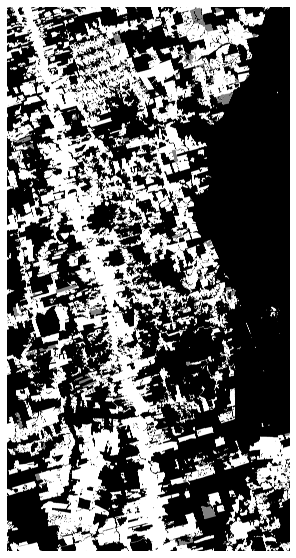

In [13]:
trainer.logger.plotFigure(trainer.label_mask, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [14]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [15]:

trainer.label_mask.dtype

dtype('uint8')

In [16]:

trainer.getLabelCurrentDeforestation()

In [17]:

trainer.loadInputImage()

ic| dataset.py:370 in loadInputImage()
    image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [18]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

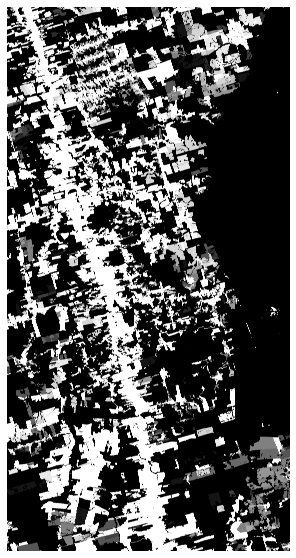

In [19]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

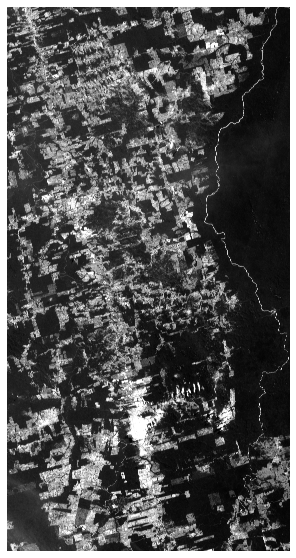

In [20]:

trainer.logger.plotFigure(trainer.image_stack[...,1], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [21]:
np.unique(trainer.label_mask, return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([101787197,   1842912,  59485891], dtype=int64))

In [22]:
# trainer.maskNoDataAsNotConsideredClass()

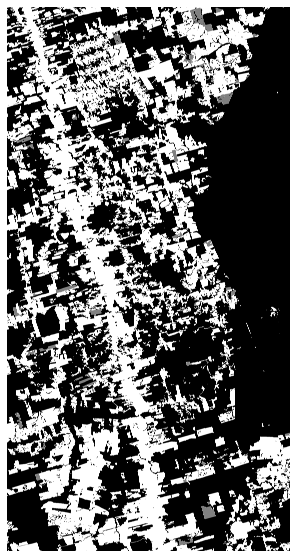

In [23]:

trainer.logger.plotFigure(trainer.label_mask, 
    name='label_mask', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [24]:

trainer.getImageChannels()

ic| base.py:100 in getImageChannels()
    self.image_stack.shape: (17730, 9200, 21)
ic| base.py:102 in getImageChannels()- self.channels: 21


In [25]:

trainer.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


In [26]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


ic| patchesHandler.py:25 in create_idx_image()
    im_idx_row.shape: (17730, 9200, 1)
    im_idx_col.shape: (17730, 9200, 1)
ic| patchesHandler.py:26 in create_idx_image()
    im_idx_row.dtype: dtype('uint16')
    im_idx_col.dtype: dtype('uint16')
ic| patchesHandler.py:32 in create_idx_image()
    im_idx.shape: (17730, 9200, 2)
    im_idx.dtype: dtype('uint16')


In [27]:
if config["training"] == True:
    trainer.extractCoords()

ic| patchesHandler.py:44 in extract_patches()
    coords.shape: (464, 239, 1, 128, 128, 2)
    coords.dtype: dtype('uint16')
ic| patchesHandler.py:48 in extract_patches()
    coords.shape: (110896, 2)
    coords.dtype: dtype('uint16')


In [28]:
if config["training"] == True:
    trainer.trainTestSplit()

ic| base.py:118 in trainTestSplit()
    self.coords_train.shape: (41812, 3)
    self.coords_val.shape: (10260, 3)


In [29]:
if config["training"] == True:
    trainer.label_mask.shape

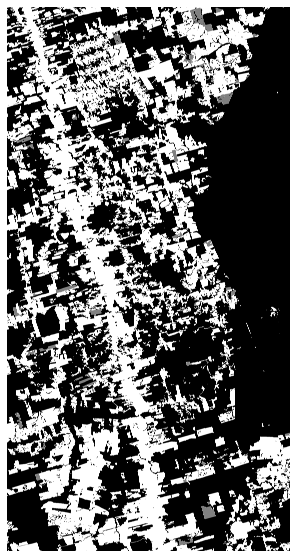

In [30]:
if config["training"] == True:

    trainer.logger.plotFigure(trainer.label_mask[...,-1], 
        name='Reference', cmap=plt.cm.gray, savefig=False)



In [31]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [32]:
if config["training"] == True:
    print(trainer.coords_train)

[[    0     0     0]
 [    0    38     0]
 [    0    76     0]
 ...
 [17594  8968     0]
 [17594  9006     0]
 [17594  9044     0]]


In [33]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

training samples:  (3756, 3) validation samples:  (1032, 3)


In [34]:
if config["training"] == True:
    inputSnipShow = True

In [35]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [36]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [37]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [38]:
trainer.dataset.image_channels

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]

In [39]:
trainer.dataset.bands

10

[2280 4750    0]
coord [2280 4750    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.29747355
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.3196338
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


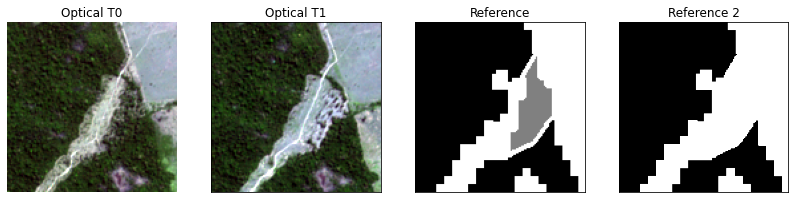

In [40]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 1000)


ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.2714837
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.30292988
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 114 5928    0]
coord [ 114 5928    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


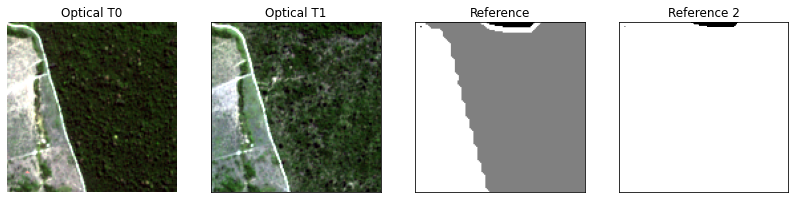

In [41]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.44512972
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.45241854


[ 874 1026    0]
coord [ 874 1026    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


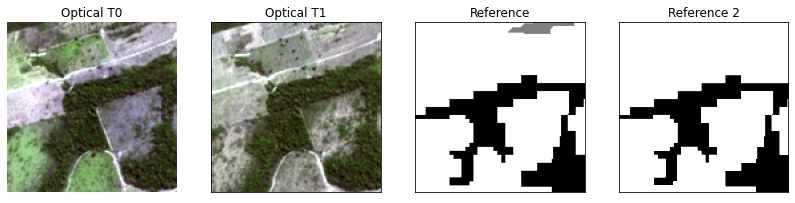

In [42]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 500)

ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.09604081
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.23388559


[ 608 6574    0]
coord [ 608 6574    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


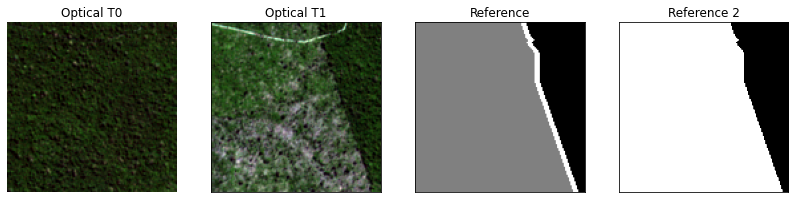

In [43]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.09604081
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.23388559


[ 608 6574    0]
coord [ 608 6574    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


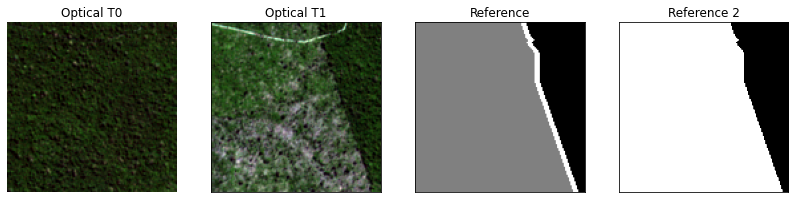

In [44]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [45]:
if config["training"] == True:
    trainer.getGenerators()


In [46]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [47]:
if config["training"] == True:
    print(trainer.path_exp)

D:/Jorge/datasets/deforestation/experiments/PA/exp4


In [48]:
if config["training"] == True:
    print(trainer.channels)

21


In [49]:
if config["training"] == True:
    print(trainer.image_stack.shape)

(17730, 9200, 21)


In [50]:
if config["training"] == True:
    print("config['training_times']", config["training_times"])

config['training_times'] 10


In [51]:
if config["training"] == True:
    for tm in range(config['training_times']):
        trainer.repetition_id = tm
        trainer.train()

time:  0


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_enc_net (InputLayer)      [(None, 128, 128, 21 0                                            
__________________________________________________________________________________________________
res1_net1 (Conv2D)              (None, 128, 128, 16) 3040        input_enc_net[0][0]              
__________________________________________________________________________________________________
drop_net1 (SpatialDropout2D)    (None, 128, 128, 16) 0           res1_net1[0][0]                  
__________________________________________________________________________________________________
res2_net1 (Conv2D)              (None, 128, 128, 16) 2320        drop_net1[0][0]                  
______________________________________________________________________________________________

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\training.py:1969: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


352/352 [==============================] - 39s 97ms/step - loss: 0.0969 - accuracy: 0.7062 - val_loss: 0.0620 - val_accuracy: 0.8585

Epoch 00001: val_loss improved from inf to 0.06197, saving model to D:/Jorge/datasets/deforestation/experiments/PA/exp4/models\resunet_0.h5
Epoch 2/100


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


352/352 [==============================] - 33s 94ms/step - loss: 0.0579 - accuracy: 0.8684 - val_loss: 0.0521 - val_accuracy: 0.8867

Epoch 00002: val_loss improved from 0.06197 to 0.05215, saving model to D:/Jorge/datasets/deforestation/experiments/PA/exp4/models\resunet_0.h5
Epoch 3/100
352/352 [==============================] - 33s 94ms/step - loss: 0.0505 - accuracy: 0.8895 - val_loss: 0.0507 - val_accuracy: 0.8965

Epoch 00003: val_loss improved from 0.05215 to 0.05065, saving model to D:/Jorge/datasets/deforestation/experiments/PA/exp4/models\resunet_0.h5
Epoch 4/100
352/352 [==============================] - 33s 95ms/step - loss: 0.0465 - accuracy: 0.9003 - val_loss: 0.0518 - val_accuracy: 0.9000

Epoch 00004: val_loss did not improve from 0.05065
Epoch 5/100
352/352 [==============================] - 33s 94ms/step - loss: 0.0434 - accuracy: 0.9076 - val_loss: 0.0488 - val_accuracy: 0.9040

Epoch 00005: val_loss improved from 0.05065 to 0.04876, saving model to D:/Jorge/datasets

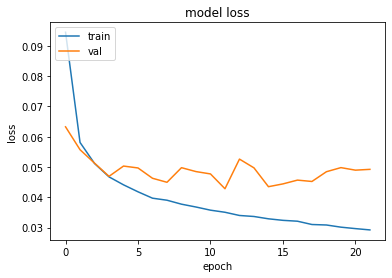

In [52]:
if config["training"] == True:
    trainer.plotHistory()


In [53]:
repetition_id = 0

In [54]:
if config["inferring"] != True:
    sys.exit()
else:
    trainer.repetition_id = repetition_id

In [55]:
trainer.image_stack.shape

(17730, 9200, 21)

In [56]:
trainer.patchesHandler.dataset.image_channels[-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [57]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]


In [58]:
trainer.image_stack.shape

(17730, 9200, 21)

In [59]:
trainer.setPadding()

-30.0 -16.0


In [60]:
trainer.infer()

time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9


In [61]:
trainer.loadPredictedProbabilities()

In [62]:
trainer.prob_rec.shape

(17760, 9216, 10)

In [63]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [64]:
trainer.prob_rec.shape

(17760, 9216, 10)

In [65]:
trainer.getMeanProb()

In [66]:
trainer.logger.getStats(trainer.mean_prob)

ic| Logger.py:119 in getStats()
    np.min(value): 2.1378262e-12
    np.mean(value): 0.0154096475
    np.max(value): 0.9997134


In [67]:
ic(trainer.mean_prob.shape)

ic| 3681128488.py:1 in <cell line: 1>()
    trainer.mean_prob.shape: (17760, 9216)

(17760, 9216)

In [68]:
trainer.unpadMeanProb()

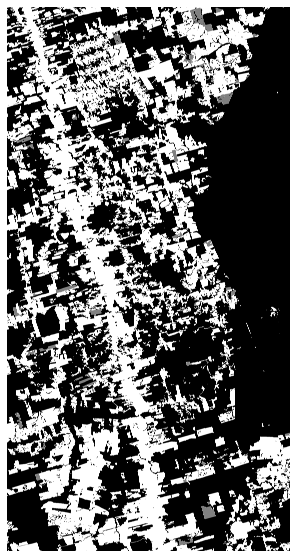

In [69]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [70]:
trainer.squeezeLabel()

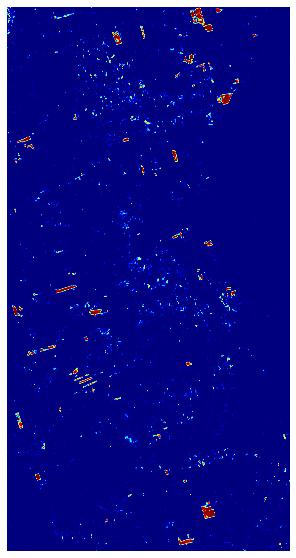

In [71]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [72]:
print(trainer.label_mask.shape)

(17730, 9200)


In [73]:
trainer.getLabelTest()

(54840627,)
(array([0, 1], dtype=uint8), array([54073429,   767198], dtype=int64))


In [74]:
# trainer.getMAP()

In [75]:
trainer.prob_rec.shape

(17760, 9216, 10)

In [76]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(10, 17760, 9216, 1)


In [77]:
trainer.prob_rec.shape

(10, 17760, 9216, 1)

In [78]:
trainer.logger.getStats(trainer.prob_rec)

ic| Logger.py:119 in getStats()
    np.min(value): 1.8268631e-22
    np.mean(value): 0.015405667
    np.max(value): 1.0


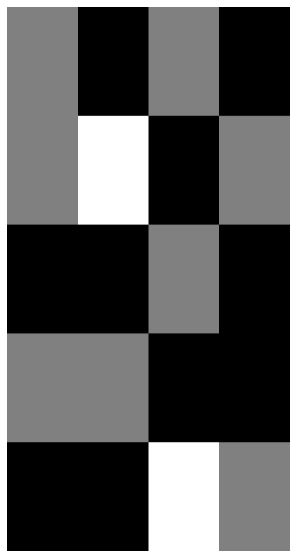

In [79]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [80]:
trainer.getLabelCurrentDeforestation()

In [81]:
trainer.applyProbabilityThreshold()

(17730, 9200)
(array([0., 1.], dtype=float32), array([161057912,   2058088], dtype=int64))


ic| base.py:395 in applyProbabilityThreshold()
    self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [82]:
trainer.getTestValues()

ic| base.py:418 in getTestValues()- predicted_test.shape: (81558000,)
ic| base.py:427 in getTestValues()- predicted_test.shape: (54840627,)


In [83]:
trainer.removeSmallPolygons()

ic| metrics.py:213 in removeSmallPolygonsForMetrics()
    np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161057912,   2058088], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161265738,   1850262], dtype=int64))
ic| metrics.py:215 in removeSmallPolygonsForMetrics()
    np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162908174,    207826], dtype=int64))


In [84]:
trainer.calculateMetrics()

ic| base.py:470 in calculateMetrics()
    self.f1: 85.43
    self.precision: 85.61
    self.recall: 85.25


In [85]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| base.py:400 in getValidationValuesForMetrics()
    self.label_mask_val.shape: (16311600,)
ic| base.py:406 in getValidationValuesForMetrics()
    self.label_mask_val_valid.shape: (9428571,)
ic| base.py:481 in calculateMetricsValidation()
    f1_val: 85.15
    precision_val: 80.16
    recall_val: 90.8
    mAP_val: 87.61


In [86]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [87]:
trainer.get_label_no_buffer()

D:/Jorge/datasets/deforestation/PA/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:430 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| dataset.py:433 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:437 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PA/deforestation_before_2008_PA.tif


ic| dataset.py:441 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| dataset.py:443 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| dataset.py:422 in loadLabel()
    label_per_date.shape: (17730, 9203, 1)


In [88]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([162563780,    552220], dtype=int64))


In [89]:
trainer.getErrorMaskToShowRGB()

[0. 1.]


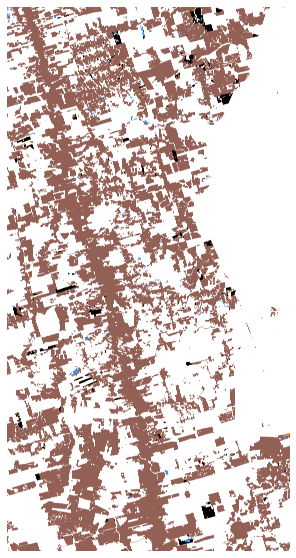

In [90]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [91]:
'''
import types

trainer.setUncertainty = types.MethodType(setUncertainty, trainer)
'''


'\nimport types\n\ntrainer.setUncertainty = types.MethodType(setUncertainty, trainer)\n'

In [92]:
trainer.setUncertainty()

K = 1, pred_mean shape (17760, 9216, 1)


In [93]:
trainer.uncertainty_map[trainer.uncertainty_map>1] = 1

In [94]:
trainer.logger.getStats(trainer.uncertainty_map)

ic| Logger.py:119 in getStats()
    np.min(value): 5.744502e-11
    np.mean(value): 0.009467624
    np.max(value): 0.36787948


In [95]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| Logger.py:119 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.008311321
    np.max(value): 0.36787948


ic| 2250769769.py:4 in <cell line: 4>()
    trainer.uncertainty_to_show.shape: (17730, 9200)


(17730, 9200)

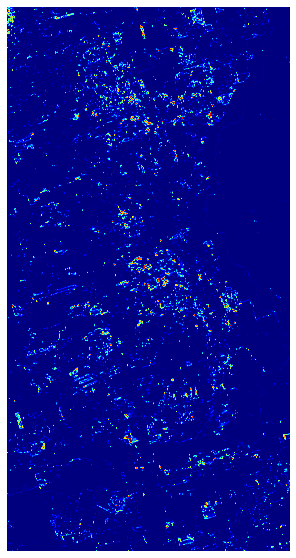

In [96]:

trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(trainer.uncertainty_to_show.shape)



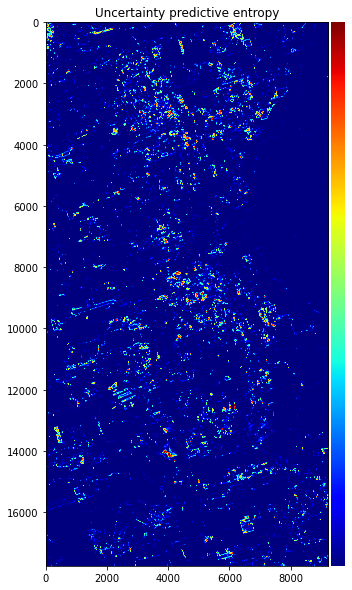

In [97]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(trainer.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [98]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| base.py:521 in getTestValues2()
    self.label_mask.shape: (17730, 9200)
ic| base.py:522 in getTestValues2()
    self.mask_amazon_ts.shape: (17730, 9200)
ic| base.py:526 in getTestValues2()
    self.label_mask_test.shape: (81558000,)
ic| base.py:534 in getTestValues2()
    self.error_mask_test.shape: (54741781,)


In [99]:
# trainer.dataset.previewLims1 = np.array([5000, 7500,  12000, 14000])



ic| Logger.py:163 in plotCropSample()
    trainer.dataset.previewLims1: array([ 5000,  7500, 12000, 14000])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| Logger.py:165 in plotCropSample()
    np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([], dtype=uint8)
ic| Logger.py:167 in plotCropSample()
    np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))


ValueError: zero-size array to reduction operation minimum which has no identity

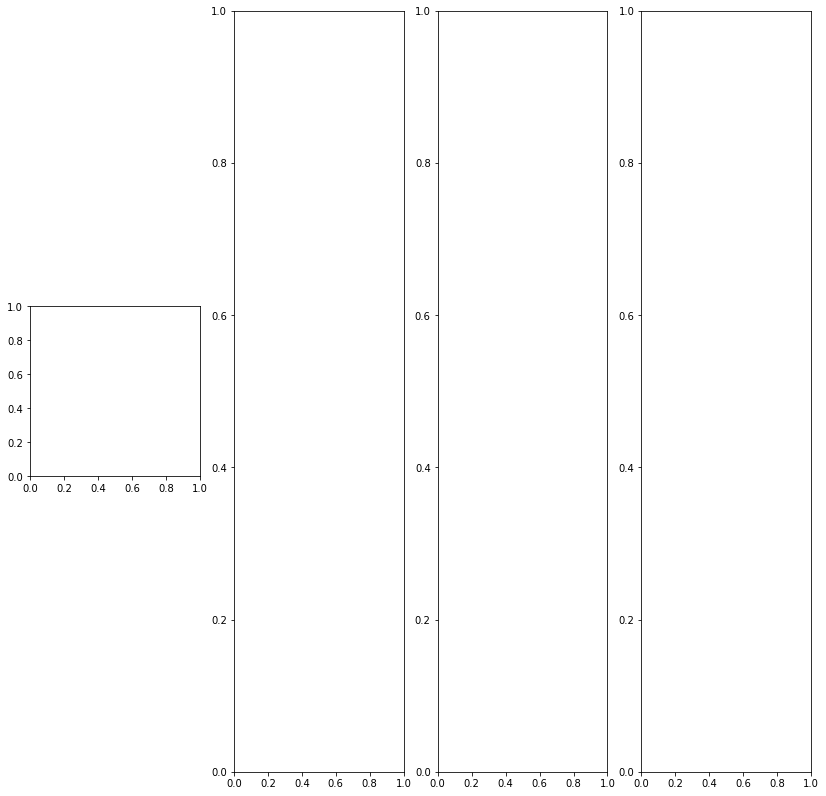

In [100]:
trainer.logger.plotCropSample(trainer)

In [ ]:
if config["plotLandsat"] == True:
    label_tmp_dates = []
    for date in dataset.prodes_dates:
        label_tmp_date = dataset.loadLabelFromDate(date)
        label_tmp_date = label_tmp_date[:trainer.mask_tiles.shape[0], :trainer.mask_tiles.shape[1]]
        label_tmp_dates.append(label_tmp_date)

In [ ]:
if config["plotLandsat"] == True:
    # del trainer.image_stack
    import src.lansdatLoader as ll
    import importlib
    importlib.reload(ll)
    landsatLoader = ll.LandsatLoader(dataset)
    ims = landsatLoader.load()
    for idx in range(len(ims)):
        ims[idx] = ims[idx][:trainer.mask_tiles.shape[0], :trainer.mask_tiles.shape[1],:]
    ims = landsatLoader.darken_past_deforestation(ims, trainer.label_no_buffer)
    ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

In [ ]:
if config["plotLandsat"] == True:
    logger.plotCropSampleLandsat(trainer, ims)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


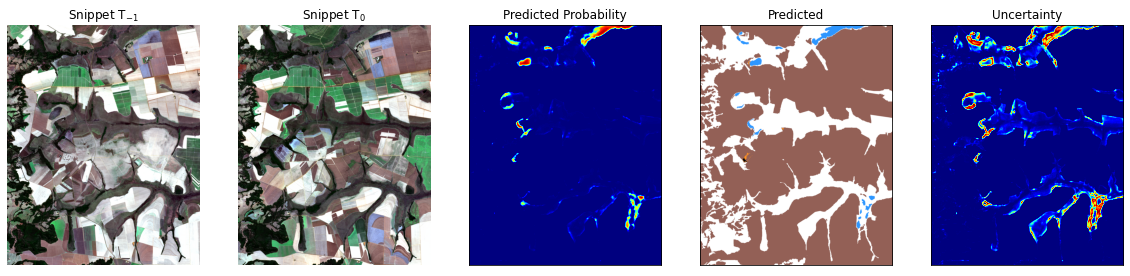

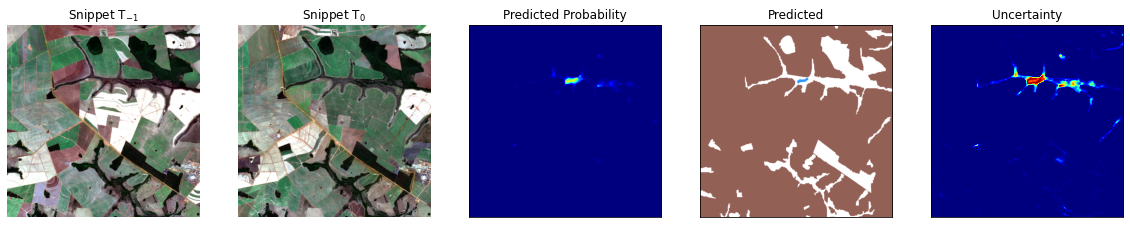

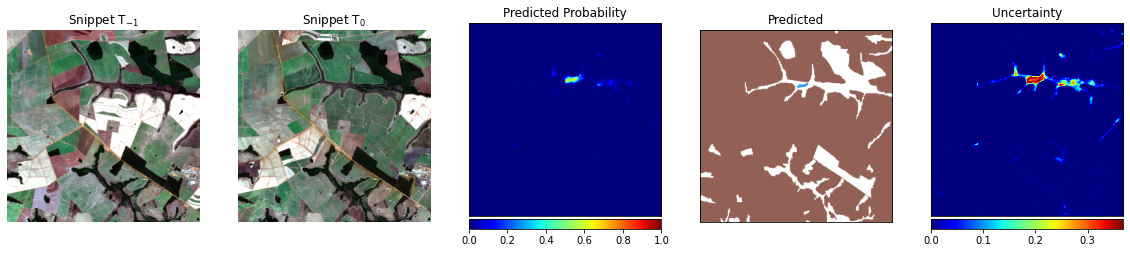

In [ ]:
trainer.logger.plotCropSampleT0T1(trainer)

In [ ]:
trainer.logger.getStats(trainer.uncertainty)


ic| Logger.py:119 in getStats()
    np.min(value): 5.5663167e-09
    np.mean(value): 0.013534625
    np.max(value): 0.36787948


In [ ]:
'''
trainer.getOtherUncertaintyMetrics()
print(trainer.sUEO)

print(trainer.ece_score)  
'''

'\ntrainer.getOtherUncertaintyMetrics()\nprint(trainer.sUEO)\n\nprint(trainer.ece_score)  \n'

In [ ]:
if config["plotPOI"] == True and config['site'] == 'PA':

    print(trainer.mean_prob.shape)
    font = {'family': "Times New Roman",
            'color':  'white',
            'weight': 'bold',
            'size': 24,
            }

    lims = dataset.previewLims1
    im = trainer.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['A', 'B', 'C', 'D', 'E', 'F']

    for poi_id in range(4):
            
            plt.text(trainer.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                    trainer.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')

    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi0.png'), 
    dpi=150, bbox_inches='tight')

    lims = dataset.previewLims2
    im = trainer.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['E', 'F']

    print(trainer.dataset.snippet_coords['snippet_id1'])
    for poi_id in range(2):
            
            plt.text(trainer.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                    trainer.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')
            
    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi1.png'), 
    dpi=150, bbox_inches='tight')

In [ ]:
if config["plotPOI"] == True and config['site'] == 'PA':
    trainer.getPOIValues()


In [ ]:

if config["plotPOI"] == True and config['site'] == 'PA':
    import pickle
    with open('output/log/log_ensemble_.pkl', 'wb') as f:
                pickle.dump(trainer.snippet_poi_results, f)


In [ ]:
from src import metrics as _metrics

def getUncertaintyAAValues(self):



    # self.threshold_list = [0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36]

    # self.threshold_list = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36, np.max(uncertainty)-0.003]
    if self.config['uncertainty_method'] == "pred_entropy_single":
        self.threshold_list = [0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    if self.config['uncertainty_method'] == "pred_entropy":
            if self.classes_mode == False:
                    self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    # self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                    #         0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
            else:
                    self.threshold_list = [0.0025, 0.025, 0.05, 0.075, 0.1, 0.2, 0.4, 
                    0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    
                    # self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    # 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
    elif self.config['uncertainty_method'] == "pred_var":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.13/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.0015, np.max(self.uncertainty)-0.0008]
    elif self.config['uncertainty_method'] == "MI":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.235/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    elif self.config['uncertainty_method'] == "KL":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.006, np.max(self.uncertainty)-0.003]
    elif self.config['uncertainty_method'] == "evidential":
            # self.threshold_list = [0.015, 0.03, 0.04]
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            # self.threshold_list = [ 0.15, 0.2,  
            #          0.3, 0.35, 0.4, 0.5, 0.6, 0.7]

            # self.threshold_list = [0.015,0.1, 0.2, 0.27, 0.36, 0.45, 0.55, 0.65]

            # self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(uncertainty)-0.006, np.max(uncertainty)-0.003]
                    
            # self.threshold_list = np.linspace(np.min(uncertainty) + 0.0015, np.max(uncertainty) - 0.0015, 19)
    print(self.threshold_list)
    self.loadThresholdMetrics = False
    if self.loadThresholdMetrics == False:
            # self.threshold_list = [0.1]
            # y_test
            ic(self.uncertainty.shape, self.label_mask_current_deforestation_test.shape)

            metrics_values = _metrics.getAA_Recall(self.uncertainty, 
                    self.label_mask_current_deforestation_test, 
                    self.predicted_test, self.threshold_list)

            # ic(metrics_values)


    self.m = {'precision_L': metrics_values[:,0],
            'recall_L': metrics_values[:,1],
            'recall_Ltotal': metrics_values[:,2],
            'AA': metrics_values[:,3],
            'precision_H': metrics_values[:,4],
            'recall_H': metrics_values[:,5],
            'UEO': metrics_values[:,6]}

    self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
    self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [ ]:

import types

trainer.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, trainer)



Get precision-recall threshold

In [ ]:

trainer.getUncertaintyAAValues()

ic| 810240186.py:62 in getUncertaintyAAValues()
    self.uncertainty.shape: (36849521,)
    self.label_mask_current_deforestation_test.shape: (36849521,)


[0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.3648794801235199, 0.3663794801235199]
threshold 0.0075


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (9901710,)
    predicted_test_classified_incorrect.shape: (9901710,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 9901710
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 9901710
    len(label_mask_current_deforestation_test): 36849521


[0.94783921 0.90512041 0.34214511 0.26870661 0.63572059 0.78486697
 0.01186848]
threshold 0.01


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (8410360,)
    predicted_test_classified_incorrect.shape: (8410360,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 8410360
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 8410360
    len(label_mask_current_deforestation_test): 36849521


[0.93841498 0.90682849 0.36935342 0.22823526 0.62691909 0.77775011
 0.01371253]
threshold 0.015


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (6425961,)
    predicted_test_classified_incorrect.shape: (6425961,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 6425961
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 6425961
    len(label_mask_current_deforestation_test): 36849521


[0.92565271 0.91030697 0.40957561 0.17438384 0.61296432 0.76490164
 0.01743824]
threshold 0.025


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (4322190,)
    predicted_test_classified_incorrect.shape: (4322190,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4322190
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4322190
    len(label_mask_current_deforestation_test): 36849521


[0.90240961 0.91508709 0.46000794 0.11729298 0.5981205  0.74464297
 0.02459746]
threshold 0.05


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2298530,)
    predicted_test_classified_incorrect.shape: (2298530,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2298530
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2298530
    len(label_mask_current_deforestation_test): 36849521


[0.8700117  0.92057594 0.53013678 0.06237612 0.57779025 0.70778037
 0.04186125]
threshold 0.08


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1412056,)
    predicted_test_classified_incorrect.shape: (1412056,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1412056
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1412056
    len(label_mask_current_deforestation_test): 36849521


[0.84700011 0.92077465 0.58617661 0.03831952 0.55891224 0.67186518
 0.06095096]
threshold 0.1


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1101977,)
    predicted_test_classified_incorrect.shape: (1101977,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1101977
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1101977
    len(label_mask_current_deforestation_test): 36849521


[0.83596793 0.92095739 0.6168773  0.02990478 0.54594391 0.64645916
 0.07273141]
threshold 0.15


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (679036,)
    predicted_test_classified_incorrect.shape: (679036,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 679036
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 679036
    len(label_mask_current_deforestation_test): 36849521


[0.81697522 0.92089956 0.67864408 0.01842727 0.50863613 0.57658969
 0.09934646]
threshold 0.2


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (459391,)
    predicted_test_classified_incorrect.shape: (459391,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 459391
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 459391
    len(label_mask_current_deforestation_test): 36849521


[0.79804247 0.91888059 0.72620942 0.01246667 0.47562718 0.49653982
 0.11834436]
threshold 0.225


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (384583,)
    predicted_test_classified_incorrect.shape: (384583,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 384583
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 384583
    len(label_mask_current_deforestation_test): 36849521


[0.78934813 0.91771034 0.74635565 0.01043658 0.45795807 0.44970269
 0.12498235]
threshold 0.25


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (322004,)
    predicted_test_classified_incorrect.shape: (322004,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 322004
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 322004
    len(label_mask_current_deforestation_test): 36849521


[0.78076042 0.91609551 0.76499812 0.00873835 0.4382041  0.39606766
 0.12947113]
threshold 0.27


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (277560,)
    predicted_test_classified_incorrect.shape: (277560,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 277560
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 277560
    len(label_mask_current_deforestation_test): 36849521


[0.77359406 0.91456886 0.77851092 0.00753226 0.42285305 0.34828303
 0.13142958]
threshold 0.3


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (216494,)
    predicted_test_classified_incorrect.shape: (216494,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 216494
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 216494
    len(label_mask_current_deforestation_test): 36849521


[0.76116464 0.91085534 0.79855175 0.00587508 0.39829986 0.25769406
 0.12807446]
threshold 0.34


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (135070,)
    predicted_test_classified_incorrect.shape: (135070,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 135070
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 135070
    len(label_mask_current_deforestation_test): 36849521


[0.73978491 0.90167081 0.82536654 0.00366545 0.37546567 0.05858175
 0.10283662]
threshold 0.36


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (72234,)
    predicted_test_classified_incorrect.shape: (72234,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 72234
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 72234
    len(label_mask_current_deforestation_test): 36849521


[0.73552379 0.8700451  0.83032405 0.00196024        nan 0.
 0.06749779]
threshold 0.3648794801235199


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (44713,)
    predicted_test_classified_incorrect.shape: (44713,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 44713
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 44713
    len(label_mask_current_deforestation_test): 36849521


[0.73552379 0.85479799 0.83032405 0.00121339        nan 0.
 0.04798215]
threshold 0.3663794801235199


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (31536,)
    predicted_test_classified_incorrect.shape: (31536,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 31536
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 31536
    len(label_mask_current_deforestation_test): 36849521


[0.73552379 0.84762687 0.83032405 0.0008558         nan 0.
 0.0365418 ]


In [ ]:
trainer.getUncertaintyAAAuditedValues()

ic| base.py:664 in getUncertaintyAAAuditedValues()
    self.uncertainty.shape: (36849521,)
    self.label_mask_current_deforestation_test.shape: (36849521,)


threshold 0.0075
(36849521,) (36849521,)
cm_audited [[36559543     5359]
 [   10208   274411]]
[0.98084498 0.96413451]
threshold 0.01
(36849521,) (36849521,)
cm_audited [[36558003     6899]
 [   10801   273818]]
[0.97542365 0.96205102]
threshold 0.015
(36849521,) (36849521,)
cm_audited [[36555539     9363]
 [   11486   273133]]
[0.96685617 0.9596443 ]
threshold 0.025
(36849521,) (36849521,)
cm_audited [[36550743    14159]
 [   12149   272470]]
[0.95060165 0.95731487]
threshold 0.05
(36849521,) (36849521,)
cm_audited [[36542358    22544]
 [   13018   271601]]
[0.92335753 0.95426166]
threshold 0.08
(36849521,) (36849521,)
cm_audited [[36534765    30137]
 [   14355   270264]]
[0.89967743 0.94956415]
threshold 0.1
(36849521,) (36849521,)
cm_audited [[36530451    34451]
 [   15069   269550]]
[0.88667471 0.94705554]
threshold 0.15
(36849521,) (36849521,)
cm_audited [[36521630    43272]
 [   16591   268028]]
[0.86099582 0.94170804]
threshold 0.2
(36849521,) (36849521,)
cm_audited [[36512595  

ic| base.py:670 in getUncertaintyAAAuditedValues()
    metric_values_audited: array([[0.98084498, 0.96413451],
                                  [0.97542365, 0.96205102],
                                  [0.96685617, 0.9596443 ],
                                  [0.95060165, 0.95731487],
                                  [0.92335753, 0.95426166],
                                  [0.89967743, 0.94956415],
                                  [0.88667471, 0.94705554],
                                  [0.86099582, 0.94170804],
                                  [0.83586305, 0.93588973],
                                  [0.82408669, 0.93307544],
                                  [0.81234865, 0.9299344 ],
                                  [0.80275268, 0.92727822],
                                  [0.78628132, 0.9218464 ],
                                  [0.75813085, 0.90999195],
                                  [0.74580388, 0.87597806],
                                  [0.74206561, 0.

cm_audited [[36479925    84977]
 [   42483   242136]]
[0.74022127 0.8507373 ]


In [ ]:
trainer.setPlotLimsForUncertaintyAA()

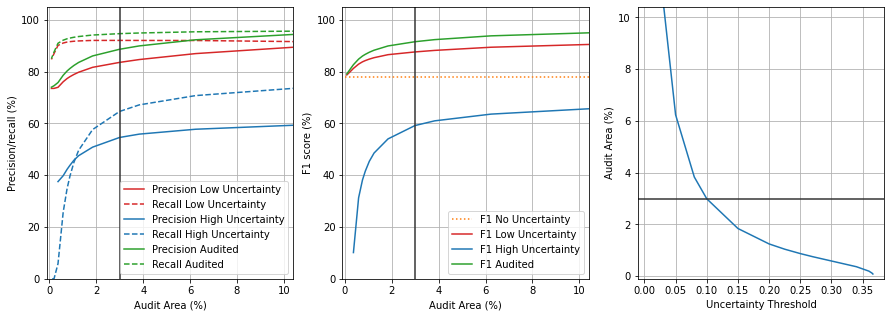

In [ ]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
trainer.plotUncertaintyAA(normalize_xlim=False)

In [ ]:
trainer.getOptimalUncertaintyThreshold(bound = 0.0015)

ic| base.py:772 in getOptimalUncertaintyThreshold()
    bounds: (0.0015, 0.3663794801235199)


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.1408715596097929
threshold 0.1408715596097929


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (733878,)
    predicted_test_classified_incorrect.shape: (733878,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 733878
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 733878
    len(label_mask_current_deforestation_test): 36849521


[0.82049635 0.92113187 0.66850421 0.01991554 0.51513287 0.59002806
 0.09516731]
0.22700792051372695
threshold 0.22700792051372695


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (379293,)
    predicted_test_classified_incorrect.shape: (379293,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 379293
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 379293
    len(label_mask_current_deforestation_test): 36849521


[0.78869717 0.91762905 0.74790158 0.01029302 0.45634751 0.44561583
 0.12544601]
0.08763636090393405
threshold 0.08763636090393405


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1277909,)
    predicted_test_classified_incorrect.shape: (1277909,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1277909
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1277909
    len(label_mask_current_deforestation_test): 36849521


[0.84210657 0.92076107 0.59798889 0.03467912 0.55479395 0.6627745
 0.06546855]
0.05473519870585886
threshold 0.05473519870585886


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2099229,)
    predicted_test_classified_incorrect.shape: (2099229,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2099229
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2099229
    len(label_mask_current_deforestation_test): 36849521


[0.8656191  0.92083663 0.5400026  0.05696761 0.57483235 0.70198197
 0.04502968]
0.10797039741171771
threshold 0.10797039741171771


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1008456,)
    predicted_test_classified_incorrect.shape: (1008456,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1008456
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1008456
    len(label_mask_current_deforestation_test): 36849521


[0.83276492 0.9211732  0.6279904  0.02736687 0.53986557 0.63572738
 0.07746085]
0.10599131715889686
threshold 0.10599131715889686


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1030618,)
    predicted_test_classified_incorrect.shape: (1030618,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1030618
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1030618
    len(label_mask_current_deforestation_test): 36849521


[0.83352144 0.92115723 0.62534827 0.02796829 0.54134808 0.6383002
 0.0762779 ]
0.10008622763439554
threshold 0.10008622763439554


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1100898,)
    predicted_test_classified_incorrect.shape: (1100898,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1100898
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1100898
    len(label_mask_current_deforestation_test): 36849521


[0.83589109 0.92095975 0.61697919 0.0298755  0.54594823 0.64636379
 0.07277445]
0.09533080169876577
threshold 0.09533080169876577


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1163166,)
    predicted_test_classified_incorrect.shape: (1163166,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1163166
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1163166
    len(label_mask_current_deforestation_test): 36849521


[0.83815872 0.92094258 0.60967117 0.03156529 0.54957864 0.65283423
 0.07004807]
0.10028849669900912
threshold 0.10028849669900912


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1098293,)
    predicted_test_classified_incorrect.shape: (1098293,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1098293
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1098293
    len(label_mask_current_deforestation_test): 36849521


[0.83579129 0.9209402  0.61726378 0.02980481 0.54581867 0.64613434
 0.072891  ]
0.09885957192511359
threshold 0.09885957192511359


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1116516,)
    predicted_test_classified_incorrect.shape: (1116516,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1116516
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1116516
    len(label_mask_current_deforestation_test): 36849521


[0.83650524 0.92094521 0.61509597 0.03029934 0.54685854 0.64807507
 0.07207738]
0.09961768684594394
threshold 0.09961768684594394


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1106838,)
    predicted_test_classified_incorrect.shape: (1106838,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1106838
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1106838
    len(label_mask_current_deforestation_test): 36849521


[0.83613692 0.92096794 0.61631163 0.0300367  0.54623718 0.64695386
 0.07250914]
0.09946427832905726
threshold 0.09946427832905726


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1108731,)
    predicted_test_classified_incorrect.shape: (1108731,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1108731
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1108731
    len(label_mask_current_deforestation_test): 36849521


[0.83618581 0.92097482 0.61608326 0.03008807 0.5463791  0.64714935
 0.07242026]
0.09974037925130241
threshold 0.09974037925130241


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1105248,)
    predicted_test_classified_incorrect.shape: (1105248,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1105248
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1105248
    len(label_mask_current_deforestation_test): 36849521


[0.83604769 0.92097376 0.61648379 0.02999355 0.54619451 0.64679065
 0.07257648]
0.09987248157868979
threshold 0.09987248157868979


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1103579,)
    predicted_test_classified_incorrect.shape: (1103579,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1103579
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1103579
    len(label_mask_current_deforestation_test): 36849521


[0.83599897 0.92096965 0.6166946  0.02994826 0.5460677  0.64660655
 0.07265362]
0.09970704443858018
threshold 0.09970704443858018


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1105690,)
    predicted_test_classified_incorrect.shape: (1105690,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1105690
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1105690
    len(label_mask_current_deforestation_test): 36849521


[0.83605909 0.92096712 0.61642758 0.03000555 0.54623025 0.64685069
 0.07255428]
0.09967370962635239
threshold 0.09967370962635239


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1106097,)
    predicted_test_classified_incorrect.shape: (1106097,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1106097
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1106097
    len(label_mask_current_deforestation_test): 36849521
ic| base.py:776 in getOptimalUncertaintyThreshold()
    self.threshold_optimal: 0.09970704443858018


[0.83610222 0.92096463 0.61640649 0.03001659 0.54619587 0.64687321
 0.07253986]


In [ ]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.09970704443858018


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1105690,)
    predicted_test_classified_incorrect.shape: (1105690,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1105690
    len(label_mask_current_deforestation_test): 36849521
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1105690
    len(label_mask_current_deforestation_test): 36849521


[0.83605909 0.92096712 0.61642758 0.03000555 0.54623025 0.64685069
 0.07255428]
threshold 0.09970704443858018
(36849521,) (36849521,)


ic| base.py:805 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_optimal: {'AA': array([0.03000555]),
                     'UEO': array([0.07255428]),
                     'f1': 78.01,
                     'f1_H': array([0.59229748]),
                     'f1_L': array([0.87646152]),
                     'precision_H': array([0.54623025]),
                     'precision_L': array([0.83605909]),
                     'recall_H': array([0.64685069]),
                     'recall_L': array([0.92096712]),
                     'recall_Ltotal': array([0.61642758])}
ic| base.py:806 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_audited_optimal: {'f1': array([0.91596966]),
                             'precision': array([0.88681958]),
                             'recall': array([0.94710121])}


cm_audited [[36530499    34403]
 [   15056   269563]]
[0.88681958 0.94710121]


{'metrics': {'precision_L': array([0.83605909]),
  'recall_L': array([0.92096712]),
  'recall_Ltotal': array([0.61642758]),
  'AA': array([0.03000555]),
  'precision_H': array([0.54623025]),
  'recall_H': array([0.64685069]),
  'UEO': array([0.07255428]),
  'f1_L': array([0.87646152]),
  'f1_H': array([0.59229748]),
  'f1': 78.01},
 'metrics_audited': {'precision': array([0.88681958]),
  'recall': array([0.94710121]),
  'f1': array([0.91596966])},
 'exp': 3}